<a href="https://colab.research.google.com/github/AshvinBari/Optimizing_Random_Vectors/blob/main/optimizing_random_vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [ ]:
# Step 1: Create initial random vectors
num_vectors =250 # Number of vectors (rows of the matrix)
vector_len = 10  # Dimension of each vector (columns of the matrix)
# Create the tensor and immediately normalize it
big_matrix = torch.rand(num_vectors, vector_len)
big_matrix = big_matrix / big_matrix.norm(2, dim=1, keepdim=True)
# Now set requires_grad=True  after normalization
big_matrix.requires_grad_(True)

tensor([[0.3429, 0.0923, 0.2821,  ..., 0.1205, 0.0077, 0.5191],
        [0.4851, 0.1049, 0.0028,  ..., 0.5051, 0.4020, 0.3210],
        [0.4389, 0.4991, 0.1112,  ..., 0.2741, 0.3908, 0.1416],
        ...,
        [0.4709, 0.2132, 0.1908,  ..., 0.2058, 0.3507, 0.0235],
        [0.4935, 0.1157, 0.2701,  ..., 0.4544, 0.3017, 0.2770],
        [0.3926, 0.4334, 0.4285,  ..., 0.1650, 0.1641, 0.4226]],
       requires_grad=True)

`num_vectors` is the number of vectors (rows) in the matrix, denoted as
𝑛
n. This means you are generating
𝑛
=
250
n=250 vectors.


`vector_len` is the dimensionality of each vector, denoted as
𝑑
d. Each vector lies in a
𝑑
=
10
d=10-dimensional space.

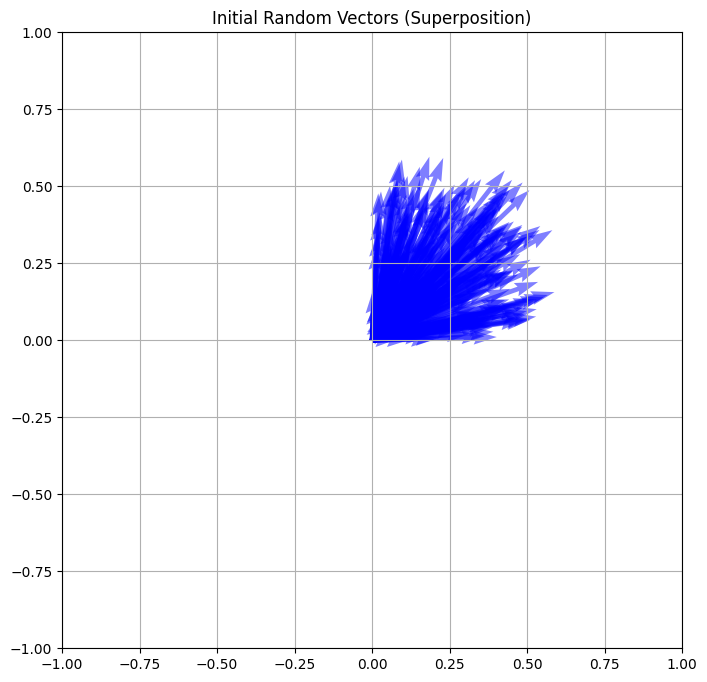

In [ ]:
# Step 2: Plot initial vectors
plt.figure(figsize=(8, 8))
for i in range(num_vectors):
    plt.quiver(0, 0, big_matrix[i, 0].item(), big_matrix[i, 1].item(), angles='xy', scale_units='xy', scale=1, color='b', alpha=0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title("Initial Random Vectors (Superposition)")
plt.grid(True)
plt.show()

In [ ]:
# Optimization loop to make vectors nearly orthogonal
optimizer = torch.optim.Adam([big_matrix], lr=0.01)
num_steps = 250
losses = []
dot_diff_cutoff = 0.01
big_id = torch.eye(num_vectors, num_vectors)

In [ ]:
# Step 3: Perform optimization
for step_num in tqdm(range(num_steps)):
    optimizer.zero_grad()
    dot_products = big_matrix @ big_matrix.T
    diff = dot_products - big_id
    loss = (diff.abs() - dot_diff_cutoff).relu().sum()
    loss += num_vectors * diff.diag().pow(2).sum()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

100%|██████████| 250/250 [00:00<00:00, 921.03it/s]


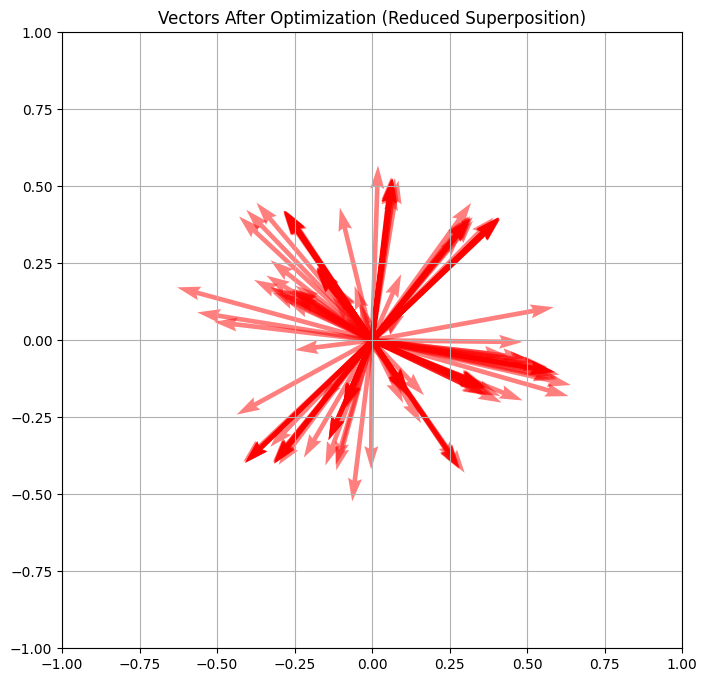

In [ ]:
# Step 4: Plot optimized vectors (After reducing superposition)
plt.figure(figsize=(8, 8))
for i in range(num_vectors):
    plt.quiver(0, 0, big_matrix[i, 0].item(), big_matrix[i, 1].item(), angles='xy', scale_units='xy', scale=1, color='r', alpha=0.5)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title("Vectors After Optimization (Reduced Superposition)")
plt.grid(True)
plt.show()